# Introduction
--------------
The electrical activity of the heart recorded by electrodes placed on the body surface is called an ElectroCardioGram or ECG. These electrodes detect the electrical changes on the skin that are caused due to the heart muscles electrophysiologic pattern of depolarizing and repolarizing during each heartbeat.

The ECG signals are widely used for diagnosis of heart diseases. An ECG record of a normal heart, called the normal sinus rhythm. It consists of a P wave, a QRS complex, and a T wave, caused by atrial depolarization, ventricular depolarization, and ventricular repolarization, respectively. Atrial repolarization is masked by the QRS complex and is not visible in the ECG
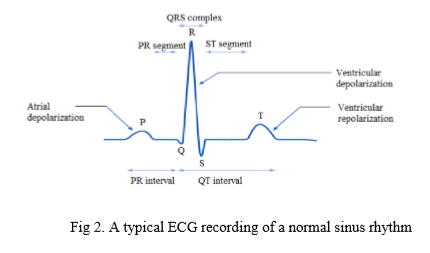
We use electrocardiograph to perform electrocardiography, and produces the electrocardiogram.

Now we are reading a ECG file and ploting it


In [135]:
%matplotlib inline
#%matplotlin nbagg

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

f= open('aami3a.dat','rb')
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
print('\n The length of the file is: ' + str(len(AllSignal)))
f.close()


 The length of the file is: 43081


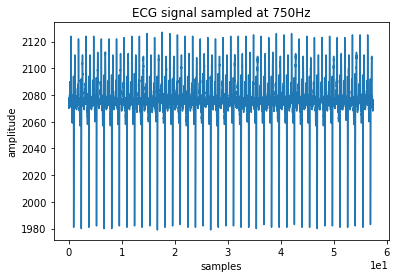

In [136]:
x=np.arange(0,43081/750.,1/750.)
plt.plot(x,AllSignal[:43081])
plt.title('ECG signal sampled at 750Hz')
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

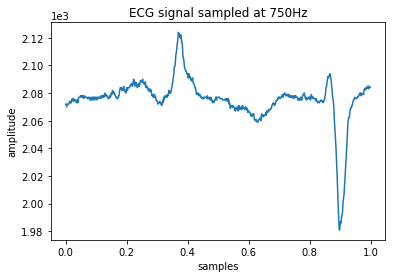

In [137]:
x=np.arange(0,750/750.,1/750.)
plt.plot(x,AllSignal[:750])
plt.title('ECG signal sampled at 750Hz')
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
f.close()

If a person at rest has an average heart rate between 60 and 100 beats per minute,we consider 80 beats per min
=80/60,=1.333  =>1.333*5  =6.665   =>6.665/1.33*10e-3 = 5001 samples

we need 5001 sample to plot 5 beats if heart rate is 80 beats per min

If a person has an average heart rate 60 beats per minute.
              
              =60/60, = 1       =>1*5 =5
              
       it takes 7 sec to get 5 heart beats 1 second to acquaring and 1 second to reverse recovery
       
      given sampling frequency is 750HZ and sampling time =1/fs =>1/750 =>1.333*10e-3
      
      number of samples =time/sampling time =>7/1.333*10e-3 =>5250
              
            to zoom in 5 heart beats we must take 5250 samples

NameError: name 'grid' is not defined

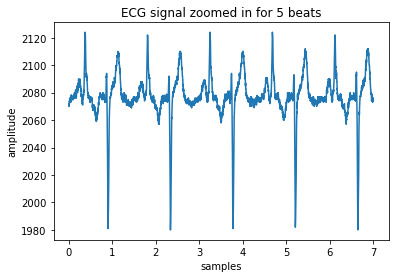

In [178]:
x=np.arange(0,5250/75e1,1/75e1)  
plt.plot(x,AllSignal[:5250])
plt.title('ECG signal zoomed in for 5 beats')
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
grid()

In [139]:
p= max(AllSignal[:5000])
print(+p)

2124


we are half samples and counting it for 30 sec

count the number of beats for 30 seconds. Multiply this number by 2 to calculate no of beats per minute.

In [140]:
a=np.arange(21541)
C=0
for index in a:
    if AllSignal[index]>=2124:
        C=C+1
print('Heart beats per minute is ' +str(C*2) )       
        

Heart beats per minute is 44


when we consider an ECG typical signal and compare it with the given data we can find that The heart rate is lower for this individual 
its is 44 beats/minute

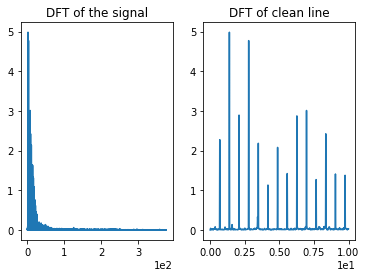

In [141]:
HeartLine=AllSignal[:43081]
dataF=HeartLine-np.mean(HeartLine)
L=len(dataF)
f=np.arange(0,75e1/2,75e1/43081)
Y=np.fft.fft(dataF)
Line=abs(Y)/L
plt.subplot(121)
plt.plot(f, Line[:21541])
plt.title('DFT of the signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>1e1)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Line[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [142]:
a=np.arange(21541)
q=max(Line)
print(+q)
for index in a:
    if Line[index]>=4.9817:
        print('Maximum is observed at frequency=' +str(index/57.44))  
        break 
       

4.98176674504
Maximum is observed at frequency=1.39275766017


Heart rate H is

$$H=\frac{60}{f}$$  where f is frequency at peak observed

f=1.39275766017

$$H=\frac{60}{1.39275766017}$$

$$H=43.08$$



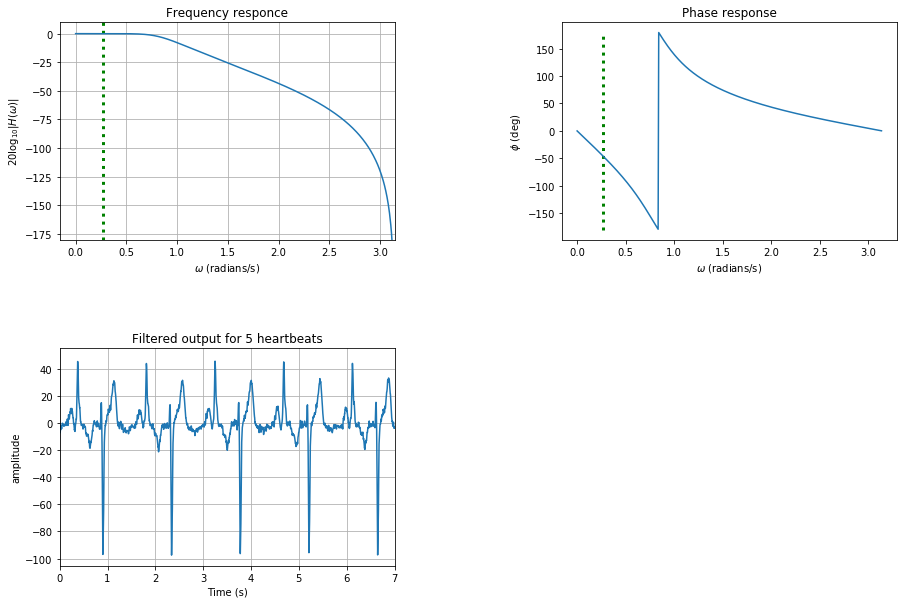

In [177]:
from scipy import signal
from __future__ import division
from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

frequency=750
Nyquest=frequency/2
cutoff= 100
Wn=100/Nyquest
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)
x=np.arange(0,43081/750.,1/750.)
c = fig.add_subplot(plt.subplot(gs[0,0]))
c.set_title('Frequency responce')
c.plot(w, 20 * np.log10(abs(h)))
c.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $")
c.set_xlabel(r'$\omega$ (radians/s)')
c.set_xlim(xmax = np.pi)
c.set_ylim(ymin=-180,ymax=10)
c.vlines(Wn,-180,180,linestyles=':',color='g',lw=3.)
c.grid()

c= fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
c.set_title('Phase response')
c.set_xlabel(r'$\omega$ (radians/s)')
c.set_ylabel(r"$\phi $ (deg)")
c.vlines(Wn,-180,180,linestyles=':',color='g',lw=3.)

c = fig.add_subplot(plt.subplot(gs[1,0]))
c.plot(x,s)
c.set_xlim(xmax = 7, xmin =0)
c.set_title('Filtered output for 5 heartbeats')
c.set_ylabel("amplitude")
c.set_xlabel('Time (s)')

c.grid()